<a href="https://colab.research.google.com/github/DonDairon/Analisis-de-datos/blob/main/Limpieza_y_taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Apertura de los datos dentro de google colab.


In [35]:
df = pd.read_csv('/content/drive/MyDrive/Estadistica y diseño de experimentos/Analisis de datos (Mintic)/Actividades estudiantes/RicardoRuiz/dataset_banco.csv')
(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


Al codificar '(df)', se muestra un resumen de los datos, con las primeras y ultimas filas, ademas de las dimensiones del archivo.


Ahora quiero conocer el tamaño original de la base de datos, para que uso la funcion shape y extraigo el numero de filas, para guardarlo la variable denominada filas. Esto con el fin de conocer la cantidad de filas original del dataset y compararlo con las depuraciones posteriores.




In [36]:
filas = df.shape
(df.shape)
filas[0]

45215

Asi mismo, para conocer el tipo de informacion que almacena cada columna, utilizo el comando 'df.info()'


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Ahora, se eliminaran las filas con NAs

In [38]:
df_mod = df.dropna()
filas_na = df_mod.shape
filas_na[0]
print('Se eliminaron', filas[0] - filas_na[0], 'filas que contenian NAs.', '\n',
      'Ahora la base de datos continene', filas_na[0], 'filas', 'de las', filas[0],
      'con que se inicio')

Se eliminaron 8 filas que contenian NAs. 
 Ahora la base de datos continene 45207 filas de las 45215 con que se inicio


Con el siguiente cuadro de codigo, se busca conocer los niveles que tiene cada variable dentro del dataset, para lo que se usa el comando 'cols_cat[]'

In [39]:
cols_cat =['job','marital','education','default','housing',
           'loan','contact', 'month','poutcome','y']
for col in cols_cat:

  print(f'columna {col}: {len(df[col].unique())} subniveles')

columna job: 19 subniveles
columna marital: 7 subniveles
columna education: 11 subniveles
columna default: 2 subniveles
columna housing: 2 subniveles
columna loan: 6 subniveles
columna contact: 5 subniveles
columna month: 12 subniveles
columna poutcome: 6 subniveles
columna y: 2 subniveles


Con la funcion 'df.describe()' se muestra la informacion estadistica del dataset

In [40]:
resumen = df_mod.describe()
resumen_df = pd.DataFrame(resumen)
desv_s = resumen_df['pdays']['std']
print(resumen_df, '\n', desv_s)


                age        balance           day      duration      campaign  \
count  45207.000000   45207.000000  45207.000000  45207.000000  45207.000000   
mean      41.005596    1374.201318     15.806534    258.032539      2.763731   
std       12.037399    3924.491665      8.323015    257.460759      3.098058   
min       18.000000   -8019.000000      1.000000  -1389.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1427.500000     21.000000    319.000000      3.000000   
max      776.000000  527532.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45207.000000  45207.000000  
mean      40.178225      0.580198  
std      100.103283      2.303341  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

Para empezar a conocer el comportamiento de los datos, se puede generar un histograma para cada variable

array([[<Axes: title={'center': 'pdays'}>]], dtype=object)

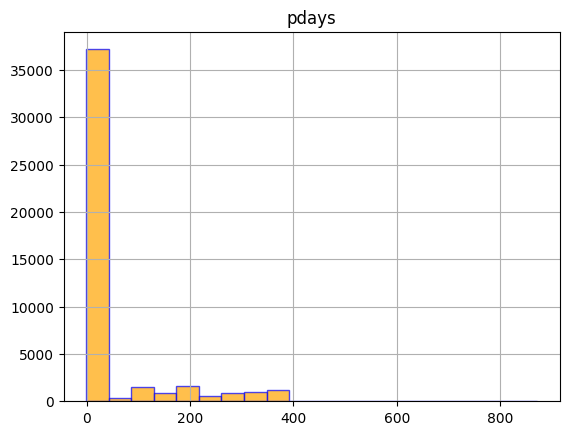

In [41]:
#en esta linea de codigo se genera el plot, se indica el color de relleno, del borde y el tamaño de las barras
df_mod.hist('pdays',bins=20, color='orange', edgecolor='blue', alpha=0.7)

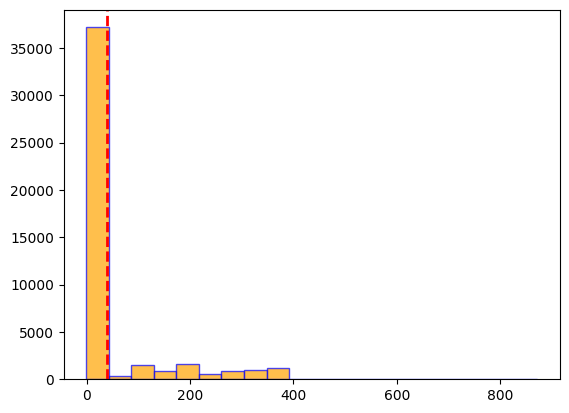

In [42]:
#con las siguientes lineas, se agrega la linea punteada que indica la media de los datos
plt.hist(df_mod['pdays'], bins=20, color='orange', edgecolor='blue', alpha=0.7)
plt.axvline(df_mod['pdays'].mean(), color='red', linestyle='dashed', linewidth=2)
#plt.axvline(media, color='black', linestyle='dashed', linewidth=1)


Ahora, se eliminaran los duplicados



In [43]:
df_mod.drop_duplicates(inplace=True)
(df_mod)

<ipython-input-43-657e2eddc770>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod.drop_duplicates(inplace=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [44]:
print(f'Ahora, quedamos con {df_mod.shape} filas y columnas')

Ahora, quedamos con (45203, 17) filas y columnas


Para graficar un boxplot a cada variable, se usa el siguiente codigo:

In [ ]:
cols_num =['age','balance','day','duration','campaign',
           'pdays', 'previous']

fig, ax =plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace= 0.5)

for i, col in enumerate (cols_num):
     sns.boxplot(x= col, data=df_mod, ax=ax[i])
     ax[i].set_title(col)

Debido a que la probabilidad de que algun individuo tenga mas de 100 años, eliminaremos aquiellos datos cuya edad supere 100.

In [46]:
df_mod.drop(df_mod[df_mod['age']>100].index)
print(f'tamaño del set desùes de eliminar los datos:{df_mod.shape}')

tamaño del set desùes de eliminar los datos:(45203, 17)


Ahora se eliminaran varios datos cuya informacion sale de los rangos 'normales', por ejemplo, previous¨>100 o duration'<0. Tambien se reemplazaron admin por administrative

In [47]:
df_mod.drop(df_mod[df_mod['age']< 0].index)
df_mod = df_mod[df_mod['previous']<=100]
df_mod['job']= df_mod['job'].str.replace('admin.', 'administrative', regex=False)
print(f'tamaño del set desùes de eliminar los datos:{df_mod.shape}')

tamaño del set desùes de eliminar los datos:(45202, 17)


<ipython-input-47-701edd14b7d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['job']= df_mod['job'].str.replace('admin.', 'administrative', regex=False)


In [134]:
df_mod.loc[df_mod['marital']=='div','marital']='divorced'
df_mod.loc[df_mod['marital']=='div.','marital']='divorced'
df_mod.loc[df_mod['marital']=='DIVORCED','marital']='divorced'
df_mod.loc[df_mod['marital']=='Single','marital']='single'
df_mod.loc[df_mod['education']=='sec','education']='secondary'
df_mod.loc[df_mod['education']=='Primary','education']='primary'
df_mod.loc[df_mod['education']=='unk','education']='unknown'
df_mod.loc[df_mod['contact']=='phone','contact'] ='telephone'
df_mod.loc[df_mod['contact']=='mobile','contact']='cellular'
df_mod.loc[df_mod['poutcome']=='unk','poutcome']='unknow'
(df_mod)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Genero,genero
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no,Femenino,Masculino
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no,Otro,Masculino
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no,Masculino,Otro
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no,Femenino,Otro
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no,Femenino,Femenino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes,Masculino,Femenino
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes,Otro,Masculino
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes,Femenino,Femenino
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no,Femenino,Otro


1. ¿Cuál es la edad promedio de los clientes interesados en adquirir un certificado de depósito?

In [58]:
edad_prom_int = df_mod[df_mod['y']=='yes']['age'].mean()
print("En promedio, los clientes interesados tienen",int(edad_prom_int), 'años de edad')

En promedio, los clientes interesados tienen 41 años de edad


2. En una gráfica, establece la diferencia de ingresos entre clientes interesados y no interesados en el certificado de depósito


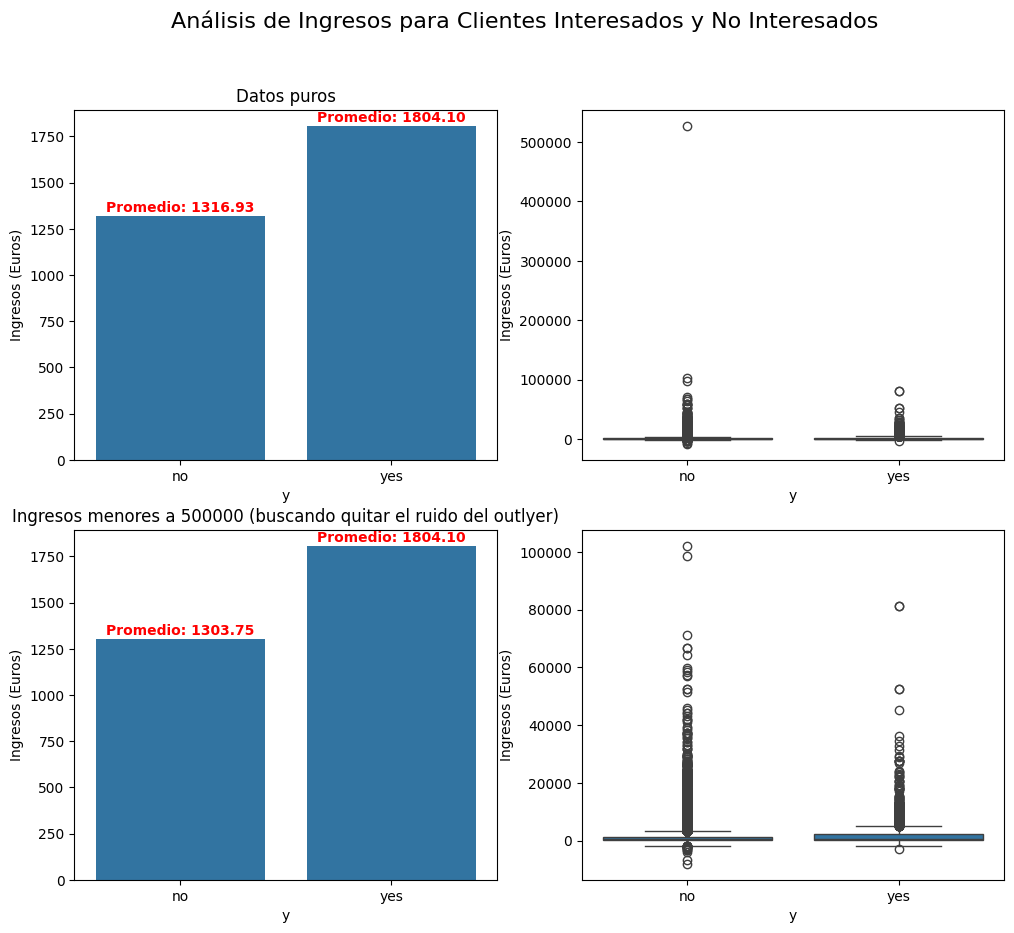

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
#Barplot
promedio_1 = df_mod.groupby('y')['balance'].mean()
sns.barplot(x=df_mod['y'], y=df_mod['balance'], data=df_mod, errorbar=None, ax=axs[0,0])
#axs[0,0].set_xlabel('Interes')
axs[0,0].set_ylabel('Ingresos (Euros)')
axs[0,0].set_title('Datos puros')
for i, valor in enumerate(promedio_1):
    axs[0, 0].text(i, valor + 45, f'Promedio: {valor:.2f}', ha='center', va='center', fontweight='bold', color='red')
#Boxplot. df[df['Ingresos'] <= 500000]
sns.boxplot(x=df_mod['y'], y=df_mod['balance'], data=df_mod, ax=axs[0,1])
#axs[0,1].set_xlabel('Interes')
axs[0,1].set_ylabel('Ingresos (Euros)')
#axs[0,1].set_title('Diferencia de Ingresos entre Clientes Interesados y No Interesados')


## Plots sin outlyers
#Barplot
balance_outlyers = df_mod[df_mod['balance']<=500000]
promedio_2 = balance_outlyers.groupby('y')['balance'].mean()
sns.barplot(x=balance_outlyers['y'], y=balance_outlyers['balance'], data=balance_outlyers, errorbar=None, ax=axs[1,0])
#axs[1,0].set_xlabel('Interes')
axs[1,0].set_ylabel('Ingresos (Euros)')
axs[1,0].set_title('Ingresos menores a 500000 (buscando quitar el ruido del outlyer)')
for i, valor in enumerate(promedio_2):
    axs[1, 0].text(i, valor + 45, f'Promedio: {valor:.2f}', ha='center', va='center', fontweight='bold', color='red')
#Boxplot. df[df['Ingresos'] <= 500000]
sns.boxplot(x=balance_outlyers['y'], y=balance_outlyers['balance'], data=balance_outlyers, ax=axs[1,1])
#axs[1,1].set_xlabel('Interes')
axs[1,1].set_ylabel('Ingresos (Euros)')
#axs[1,1].set_title('Diferencia de Ingresos entre Clientes Interesados y No Interesados')
fig.suptitle('Análisis de Ingresos para Clientes Interesados y No Interesados', fontsize=16)

plt.show()

3. En un gráfico de barras, establece la distribución de género entre clientes interesados en el certificado de depósito


In [ ]:
#Debido a que en el dataset no hay inormacion acerca del genero de cada individuo, y solo con fines didacticos, se generaran los datos
generos = np.random.choice(['Masculino', 'Femenino', 'Otro'], size=len(df_mod))
df_mod['genero'] = generos

Text(0.5, 1.0, 'Distribucion de genero entre los interesados por el producto')

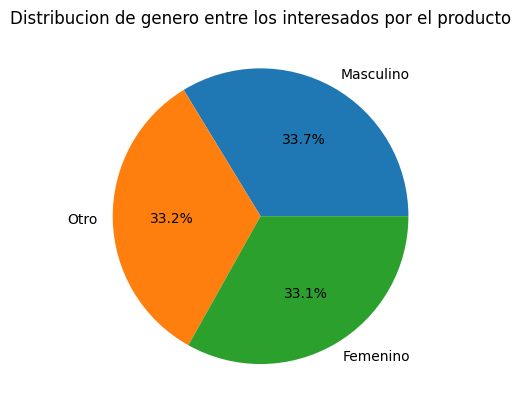

In [129]:
freq_gen = df_mod[df_mod['y']=='yes']['Genero'].value_counts()
freq_gen
plt.pie(x=freq_gen.values, labels = freq_gen.index, autopct='%1.1f%%')
plt.title('Distribucion de genero entre los interesados por el producto')
#autopct calcula e imprime el porcentaje de cada porcion

4. ¿Cuál es el nivel educativo predominante entre clientes interesados en el certificado de depósito?


Text(0.5, 1.0, 'Distribucion de genero entre los interesados por el producto')

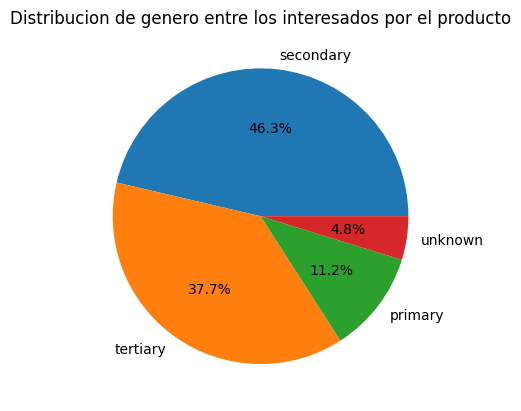

In [132]:
freq_education = df_mod[df_mod['y']=='yes']['education'].value_counts()
freq_education
plt.pie(x=freq_education.values, labels = freq_education.index, autopct='%1.1f%%')
plt.title('Distribucion de genero entre los interesados por el producto')

5. ¿Cuál es la relación entre estado civil vs el interés en adquirir el certificado de depósito?


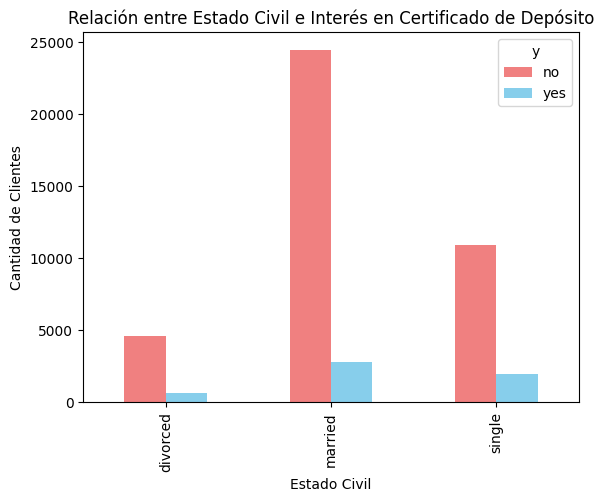

In [138]:
cross_tab = pd.crosstab(df_mod['marital'], df['y'])
cross_tab.plot(kind='bar', color=['lightcoral', 'skyblue'],  stacked=False)
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.title('Relación entre Estado Civil e Interés en Certificado de Depósito')
plt.show()

Se puede observar que la mayoria de las personas a las que se le ofrecio el producto son casadas, sin embargo, casi todas mostraon desinteres en el mismo

6. ¿Cuál es el medio de contacto más frecuente de los clientes interesados en adquirir el certificado de depósito?

Text(0, 0.5, 'Medio de contacto')

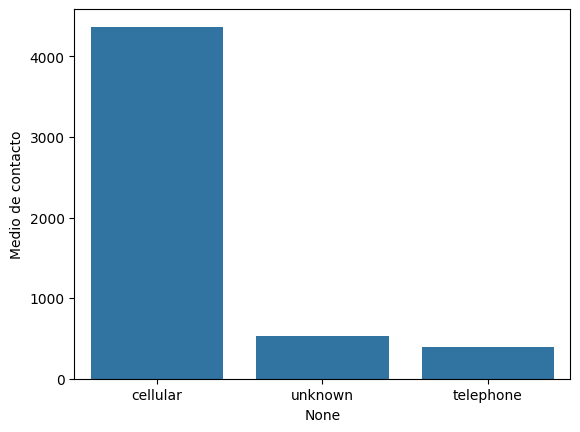

In [140]:
freq_contact = df_mod[df_mod['y']=='yes']['contact'].value_counts()
#(freq_job)
sns.barplot(x=freq_contact.index, y=freq_contact.values, )
plt.ylabel('Medio de contacto')

7. En un gráfico de barras horizontales responde, ¿Cuál es el tipo de ocupación de los clientes interesados en adquirir el certificado de depósito?


In [ ]:
ocupacion_int = df_mod[df_mod['y']=='yes']['job']
#ocupacion_int = pd.DataFrame(ocupacion_int)
ocupacion_int.hist()
#(ocupacion_int)

Text(0, 0.5, 'Ocupaciones')

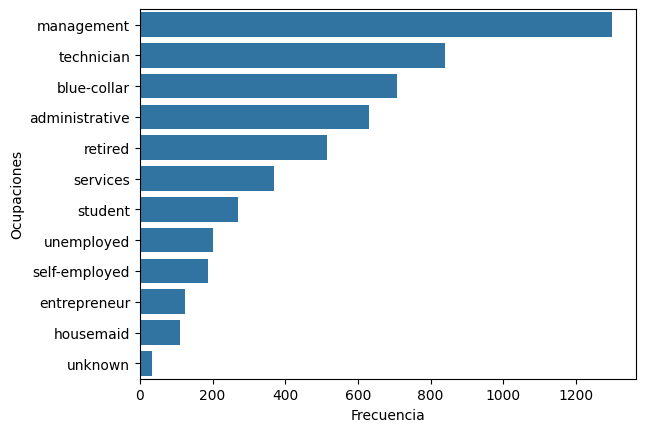

In [51]:
freq_job = df_mod[df_mod['y']=='yes']['job'].value_counts()
#(freq_job)
sns.barplot(x=freq_job.values, y=freq_job.index, )
plt.xlabel('Frecuencia')
plt.ylabel('Ocupaciones')

In [ ]:
sns.barplot(x=df_mod['y']=='yes', y=df_mod['job'], errorbar=None)
#plt.xlabel('Frecuencia')
plt.ylabel('Ocupaciones')

8. ¿Cuál es la frecuencia de contacto con los clientes interesados antes de la conversión?

In [52]:
freq_int = df_mod[df_mod['y']=='yes']['campaign'].mean()
print(f'La frecuencia de contacto promedio de los clientes interesados es de {round(freq_int,2)} dias')
#print(f'La frecuencia de contacto promedio de los clientes interesados es:{df_mod[df_mod['y']=='yes']['age'].mean()}')

La frecuencia de contacto promedio de los clientes interesados es de 2.14 dias


9. ¿Cuál es el patrón temporal en los contactos que conducen a una mayor conversión de clientes?


In [53]:
contact_time_int = df_mod[df_mod['y']=='yes']['duration'].mean()
print(f'El tiempo de contacto promedio de los clientes interesados es de {round(contact_time_int,2)} segundos')

El tiempo de contacto promedio de los clientes interesados es de 536.36 segundos
